
Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits)

In [198]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [199]:
def write_ans(val, file_name):
    with open(file_name, 'w') as file:
        file.write(str(val)) 

In [200]:
digits = load_digits()
print(digits.keys())
y = digits.target
X = digits.data
res = []

def get_res(cvs, desc):
    return (cvs, desc)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [201]:
len(X), len(X[0])

(1797, 64)

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1

In [202]:
# 1. одно решающее дерево

tree_cl = DecisionTreeClassifier()
cvs = cross_val_score(tree_cl, X, y, cv=10)
res.append(get_res(cvs, '1 tree'))

write_ans(cvs.mean(), 'ans1')
cvs.mean()

0.8263594040968343

In [203]:
# 2. 100 рещающих деревьев. Все признаки

tree_cl = DecisionTreeClassifier()
bag_cl = BaggingClassifier(base_estimator=tree_cl, n_estimators=100, random_state=0, n_jobs=-1).fit(X, y)
cvs = cross_val_score(bag_cl, X, y, cv=10, n_jobs=-1)
res.append(get_res(cvs, '100 trees. features = all'))

write_ans(cvs.mean(), 'ans2')
print(cvs.mean())



0.927048417132216


In [204]:
# 3. 100 рещающих деревьев. max_features = sqrt(num_features) (BaggingClassifier)

max_features = np.sqrt(X.shape[1]) / X.shape[1]

tree_cl = DecisionTreeClassifier()
bag_cl = BaggingClassifier(base_estimator=tree_cl, n_estimators=100, random_state=0, max_features=max_features, n_jobs=-1).fit(X, y)
cvs = cross_val_score(bag_cl, X, y, cv=10, n_jobs=-1)
res.append(get_res(cvs, '100 trees. features = sqrt(num_features). BaggingClassifier'))

write_ans(cvs.mean(), 'ans3')
cvs.mean()

0.9293389199255122

In [205]:
# 4. 100 рещающих деревьев. max_features = sqrt(num_features) (DecisionTreeClassifier)

max_features = np.sqrt(X.shape[1]) / X.shape[1]

tree_cl = DecisionTreeClassifier(max_features=max_features)
bag_cl = BaggingClassifier(base_estimator=tree_cl, n_estimators=100, random_state=0, n_jobs=-1).fit(X, y)
cvs = cross_val_score(bag_cl, X, y, cv=10, n_jobs=-1)
res.append(get_res(cvs, '100 trees. features = sqrt(num_features). DecisionTreeClassifier'))

write_ans(cvs.mean(), 'ans4')
cvs.mean()

0.9460117939168218

Оценим количество ответов в зависимости от класса

Text(0.5, 0, 'Ответы на объектах')

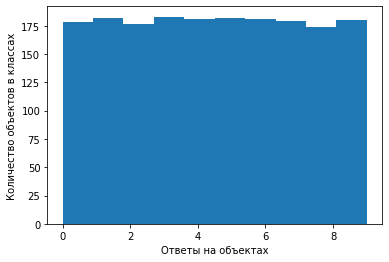

In [206]:
plt.hist(y)
plt.ylabel('Количество объектов в классах')
plt.xlabel('Ответы на объектах')

Видно, что количество объектов в кадом классе примерно одинаково.

Посмотрим общий количество объектов. 

In [207]:
n = len(y)

Посмотрим распределение ответов на первых 20% объектах. 

Text(0.5, 0, 'Ответы на объектах')

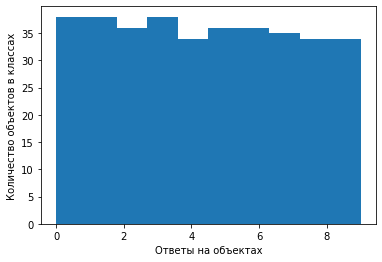

In [208]:
plt.hist(y[:int(0.2*n)])
plt.ylabel('Количество объектов в классах')
plt.xlabel('Ответы на объектах')

Видно, что объекты имеют около равномерное распределение по ответам.

In [209]:
rand_forest = RandomForestClassifier(n_jobs=-1, random_state=0).fit(X, y)
cvs = cross_val_score(rand_forest, X, y, cv=10, n_jobs=-1)
res.append(get_res(cvs, 'RandomForestClassifier'))
cvs.mean()

0.9476939788950961

In [210]:
for i in res:
    print(round(i[0].mean(), 4),'\t', i[1])

0.8264 	 1 tree
0.927 	 100 trees. features = all
0.9293 	 100 trees. features = sqrt(num_features). BaggingClassifier
0.946 	 100 trees. features = sqrt(num_features). DecisionTreeClassifier
0.9477 	 RandomForestClassifier


In [213]:
rand_forest = RandomForestClassifier(n_jobs=-1, random_state=0)
rand_forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### Исследуем качество работы Random forest в зависимости от количества деревье в нем.

In [226]:
rand_forest = RandomForestClassifier(n_jobs=-1, random_state=0)
grid_param = {'n_estimators':  np.arange(5, 501, 5)}

In [227]:
clf = GridSearchCV(rand_forest, param_grid=grid_param, cv=5, n_jobs=-1, scoring='accuracy').fit(X, y)
print(clf.best_params_)
print(clf.best_score_)

{'n_estimators': 145}
0.9415892912411019


In [231]:
clf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 145,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Text(0.5, 1.0, 'Зависимость среднего значения Accuracy от количесво дереверьев в RandomForest')

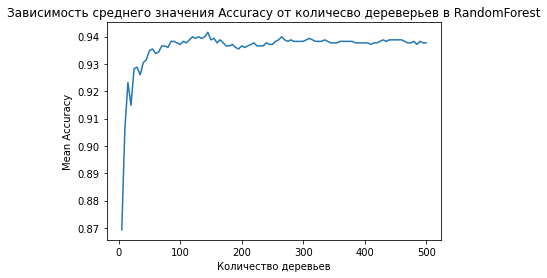

In [235]:
plt.plot(grid_param['n_estimators'], clf.cv_results_['mean_test_score'])
plt.xlabel('Количество деревьев')
plt.ylabel('Mean Accuracy')
plt.title('Зависимость среднего значения Accuracy от количесво дереверьев в RandomForest')

Таким образом 

1) Случайный лес сильно переобучается с ростом количества деревьев. 

Неверно. Из графика видно, что средняя точность держится на некотором ассимпотическом уровне с небольшим отклонением. Ни о каком переобучении речи нет.

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев

Верно. Из графика видно, что при маленьких значениях количества деревье среднее значение accuracy на кроссвалидационной выборке минимально, по сравнению с последующими значениями количества деревьев. 

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

Верно. Как видно из графика среднее значение Accuracy доходит до какого-то ассимптотического уровня и остется на нем имеея небольшие колебания.

### Исследуем качество классификации в зависимости от количества признков

In [247]:
rand_forest = RandomForestClassifier(n_jobs=-1, random_state=0)
max_f = len(X[0])
f_list = np.append(np.arange(1, max_f, 5), 64)
grid_param = {'max_features':  f_list}

In [248]:
clf = GridSearchCV(rand_forest, param_grid=grid_param, cv=5, n_jobs=-1, scoring='accuracy').fit(X, y)
print(clf.best_params_)
print(clf.best_score_)

{'max_features': 6}
0.9376988548437015


Text(0.5, 1.0, 'Зависимость среднего значения Accuracy от количетсва признаков в RandomForest')

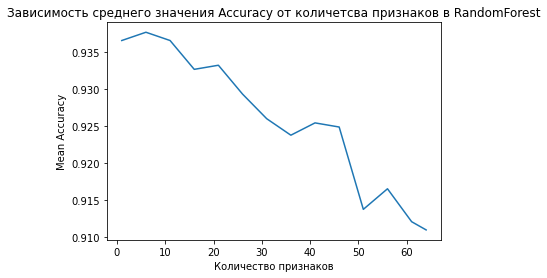

In [249]:
plt.plot(grid_param['max_features'], clf.cv_results_['mean_test_score'])
plt.xlabel('Количество признаков')
plt.ylabel('Mean Accuracy')
plt.title('Зависимость среднего значения Accuracy от количетсва признакови в RandomForest')

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

Верно.

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

Неверно.

Все видно по графику выше.

#  Исследуем качество классификации в зависимости от глубины деревьев в RandomForest

In [255]:
rand_forest = RandomForestClassifier(n_jobs=-1, random_state=0)
grid_param = {'max_depth':  np.arange(1, 200, 3)}

In [256]:
clf = GridSearchCV(rand_forest, param_grid=grid_param, cv=5, n_jobs=-1, scoring='accuracy').fit(X, y)
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 10}
0.9438084184463016


Text(0.5, 1.0, 'Зависимость среднего значения Accuracy от клбины деревьев в RandomForest')

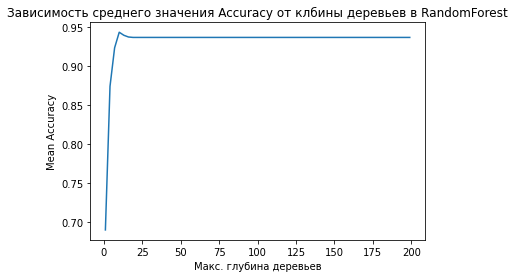

In [258]:
plt.plot(grid_param['max_depth'], clf.cv_results_['mean_test_score'])
plt.xlabel('Макс. глубина деревьев')
plt.ylabel('Mean Accuracy')
plt.title('Зависимость среднего значения Accuracy от клбины деревьев в RandomForest')

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

Неверно.

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

Верно.

Все видно из графика приведенного выше. 

In [168]:
import copy
previous_clf = copy.deepcopy(clf)

In [ ]:
clf = GridSearchCV(rand_forest, param_grid=grid_param, cv=5, n_jobs=-1, scoring='accuracy').fit(X, y)
print(clf.best_params_)
print(clf.best_score_)

{'max_features': 6}
0.9376988548437015


In [179]:
previous_clf.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [174]:
previous_clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_bootstrap', 'param_criterion', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

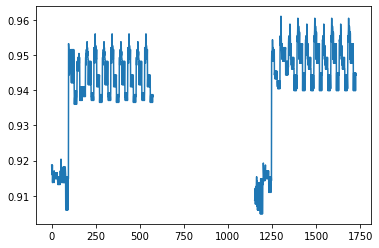

In [175]:
plt.plot(previous_clf.cv_results_['mean_test_score'])

In [105]:
# 5. 100 рещающих деревьев. max_features = sqrt(num_features) (DecisionTreeClassifier)


rand_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='log2', bootstrap=True, random_state=0, n_jobs=-1).fit(X, y)
cvs = cross_val_score(rand_forest, X, y, cv=10, n_jobs=-1)
res.append(get_res(cvs, '100 trees. features = sqrt(num_features). RandomForestClassifier'))

In [67]:
for i in res:
    print(round(i[0].mean(), 4),'\t', i[1])

0.8258 	 1 tree
0.927 	 100 trees. features = all
0.9293 	 100 trees. features = sqrt(num_features). BaggingClassifier
0.946 	 100 trees. features = sqrt(num_features). DecisionTreeClassifier
0.9477 	 100 trees. features = sqrt(num_features). RandomForestClassifier
0.9477 	 100 trees. features = sqrt(num_features). RandomForestClassifier
0.9477 	 100 trees. features = sqrt(num_features). RandomForestClassifier
0.9494 	 100 trees. features = sqrt(num_features). RandomForestClassifier
0.9471 	 100 trees. features = sqrt(num_features). RandomForestClassifier
0.9494 	 100 trees. features = sqrt(num_features). RandomForestClassifier
0.9477 	 100 trees. features = sqrt(num_features). RandomForestClassifier
0.9493 	 100 trees. features = sqrt(num_features). DecisionTreeClassifier
0.9494 	 100 trees. features = sqrt(num_features). DecisionTreeClassifier
0.9505 	 100 trees. features = sqrt(num_features). RandomForestClassifier
0.9505 	 100 trees. features = sqrt(num_features). RandomForestClass